# 데이터 실수화

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
# 데이터 set 생성
x_train = pd.DataFrame(["남성", "여성", "남성", "여성", "남성", "여성"], columns = ["성별"])

# 데이터 확인
x_train.head(3)

,성별
0,남성
1,여성
2,남성


In [3]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      6 non-null      object
dtypes: object(1)
memory usage: 176.0+ bytes


In [4]:
x_train['성별'].value_counts()

남성    3
여성    3
Name: 성별, dtype: int64

In [5]:
# 레이블 인코더 생성
encoing = LabelEncoder()
#x_train 데이터를 이용하여 피팅하고 레이블 숫자로 변환
encoing.fit(x_train["성별"])
x_train["성별_인코딩"] = encoing.transform(x_train["성별"])

In [6]:
x_train

,성별,성별_인코딩
0,남성,0
1,여성,1
2,남성,0
3,여성,1
4,남성,0
5,여성,1


In [7]:
print(list(encoing.classes_)) # 클래스 확인
print(list(encoing.inverse_transform([1,0]))) # 인코딩 값으로 문자값 확인
# print(list(encoing.inverse_transform([0,1])))

['남성', '여성']
['여성', '남성']


In [8]:
x_train.head(2)

,성별,성별_인코딩
0,남성,0
1,여성,1


In [9]:
# 원핫인코더 생성
# sparse를 True로 할 경우 "(행, 열) 1의 좌표리스트의 형식, False로 할 경우 넘파이 배열로 반환"

one_encoding = OneHotEncoder(sparse = False)
#one_encoding = OneHotEncoder(sparse = True)

# X_train 데이터를 이용하여 피팅
one_encoding.fit(x_train[["성별"]])

# 가변환값 변환
one_encoding.transform(x_train[["성별"]])

# one_encoding.fit_transform(x_train[["성별"]])

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [10]:
# 가변환된 피쳐 확인
print(one_encoding.get_feature_names())

['x0_남성' 'x0_여성']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
# 가변환된 값을 x_train_one 데이터 프레임으로 저장
x_train_one = pd.DataFrame(one_encoding.transform(x_train[["성별"]]), columns = ['성별0', '성별1'])

In [12]:
# x_train 데이터와 x_train_one의 가변환된 속성 합침
x_train = pd.concat([x_train, x_train_one], axis = 1)

In [13]:
x_train.head(3)

,성별,성별_인코딩,성별0,성별1
0,남성,0,1.0,0.0
1,여성,1,0.0,1.0
2,남성,0,1.0,0.0


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
corpus = [
    '청년 인재 개발 양성 과정',
    '인공지능 청년 양성',
    '미래 인공지능 데이터 대한민국', 
    '데이터 원유 기술사 청년 개발'
]

In [16]:
corpus

['청년 인재 개발 양성 과정', '인공지능 청년 양성', '미래 인공지능 데이터 대한민국', '데이터 원유 기술사 청년 개발']

In [17]:
type(corpus)

list

In [18]:
type(corpus)

list

In [19]:
# 카운트 벡터라이저 생성
count_vect = CountVectorizer()

# 단어 카운트
count_vect.fit(corpus)

# 단어 확인
count_vect.vocabulary_

{'청년': 10,
 '인재': 9,
 '개발': 0,
 '양성': 6,
 '과정': 1,
 '인공지능': 8,
 '미래': 5,
 '데이터': 4,
 '대한민국': 3,
 '원유': 7,
 '기술사': 2}

In [20]:
# 단어 벡터화한 값을 array로 변환하여 확인
count_vect.transform(corpus).toarray()

array([[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [21]:
# 단어 벡터화
features = count_vect.transform(corpus)
features

<4x11 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [22]:
# 속성 이름만 반환
vocab = count_vect.get_feature_names()
vocab

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['개발', '과정', '기술사', '대한민국', '데이터', '미래', '양성', '원유', '인공지능', '인재', '청년']

In [23]:
# 문서단어행렬(DTM)을 데이터 프레임으로 변환
DTM = pd.DataFrame(features.toarray(), columns = vocab).head()

In [24]:
DTM

,개발,과정,기술사,대한민국,데이터,미래,양성,원유,인공지능,인재,청년
0,1,1,0,0,0,0,1,0,0,1,1
1,0,0,0,0,0,0,1,0,1,0,1
2,0,0,0,1,1,1,0,0,1,0,0
3,1,0,1,0,1,0,0,1,0,0,1


In [25]:
# 문서단어행렬에 일치하는 단어 확인
count_vect.transform(['기술사 대한민국 인재 만세']).toarray()

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
corpus

['청년 인재 개발 양성 과정', '인공지능 청년 양성', '미래 인공지능 데이터 대한민국', '데이터 원유 기술사 청년 개발']

In [28]:
# TF-IDF 벡터라이저 생성
tfid = TfidfVectorizer()

# 단어 카운트
tfid.fit(corpus)

# 단어사전 확인
tfid.vocabulary_

{'청년': 10,
 '인재': 9,
 '개발': 0,
 '양성': 6,
 '과정': 1,
 '인공지능': 8,
 '미래': 5,
 '데이터': 4,
 '대한민국': 3,
 '원유': 7,
 '기술사': 2}

In [29]:
# 단어 벡터화한 값을 array로 변환하여 확인
tfid.transform(corpus).toarray()

array([[0.41263976, 0.52338122, 0.        , 0.        , 0.        ,
        0.        , 0.41263976, 0.        , 0.        , 0.52338122,
        0.33406745],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.61366674, 0.        , 0.61366674, 0.        ,
        0.49681612],
       [0.        , 0.        , 0.        , 0.55528266, 0.43779123,
        0.55528266, 0.        , 0.        , 0.43779123, 0.        ,
        0.        ],
       [0.41263976, 0.        , 0.52338122, 0.        , 0.41263976,
        0.        , 0.        , 0.52338122, 0.        , 0.        ,
        0.33406745]])

In [30]:
# 단어 벡터화
features_idf = tfid.transform(corpus)

In [31]:
features_idf

<4x11 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [32]:
# 속성 이름만 반환
vocab_idf = count_vect.get_feature_names()
vocab_idf

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['개발', '과정', '기술사', '대한민국', '데이터', '미래', '양성', '원유', '인공지능', '인재', '청년']

In [33]:
# 문서단어행렬(DTM)을 데이터 프레임으로 변환
DTM_idf = pd.DataFrame(features_idf.toarray(), columns = vocab_idf).head()
DTM_idf

,개발,과정,기술사,대한민국,데이터,미래,양성,원유,인공지능,인재,청년
0,0.41264,0.523381,0.000000,0.000000,0.000000,0.000000,0.412640,0.000000,0.000000,0.523381,0.334067
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.613667,0.000000,0.613667,0.000000,0.496816
2,0.00000,0.000000,0.000000,0.555283,0.437791,0.555283,0.000000,0.000000,0.437791,0.000000,0.000000
3,0.41264,0.000000,0.523381,0.000000,0.412640,0.000000,0.000000,0.523381,0.000000,0.000000,0.334067


# 결측값 처리

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' : # window OS
    font_family = "Malgun Gothic"
else: # Mac OS
    font_family = "AppleGothic"
    
# 값이 깨지는 문제 해결을 위해 파라미터 값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

from sklearn.impute import SimpleImputer # sklearn의 열의 평균이나 중앙값, 최빈값으로 대체하게 해주는 클래스
from sklearn import linear_model # sklearn의 선형회귀 모델

In [35]:
# 실습 데이터 생성
temp_dict = {'A열' : [np.nan, 4, 6, 5, 5, np.nan],
            'B열' : ['a', 'a', np.nan, 'b', 'b', 'b'],
            'C열' : [np.nan, 3.5, -1.5, np.nan, 5.5, np.nan],
            'D열' : [1, 0, 1, 0, 1, 1]}
missing_data = pd.DataFrame(temp_dict)
missing_data

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [36]:
# info() 데이터 프레임 정보 확인 index : 인덱스 버위, count 값으로 결측값 유무 확인
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A열      4 non-null      float64
 1   B열      5 non-null      object 
 2   C열      3 non-null      float64
 3   D열      6 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 320.0+ bytes


In [37]:
# isnull, isnull(df) 함수 이용, 결측값 확인
missing_data.isnull() # true이면 결측값, false 이면 결측값 아님

,A열,B열,C열,D열
0,True,False,True,False
1,False,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False
5,True,False,True,False


In [38]:
# 결측값 갯수 확인
missing_data.isnull().sum()

A열    2
B열    1
C열    3
D열    0
dtype: int64

In [39]:
# 속성별 결측값 갯수 확인 'A열'의 결측값 갯수 확인
print(missing_data['A열'].isnull().sum())
print(missing_data['B열'].isnull().sum())
print(missing_data['C열'].isnull().sum())
print(missing_data['D열'].isnull().sum())

2
1
3
0


<AxesSubplot:>

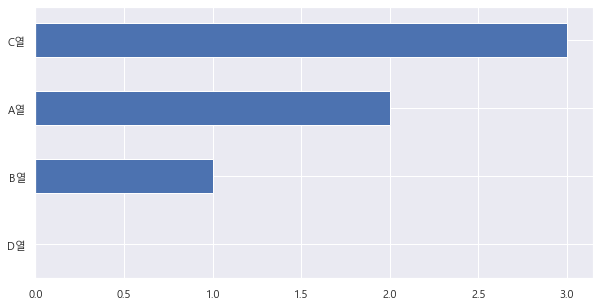

In [40]:
# 결측값 시각화 : 결측값이 많은 속성 순으로 정렬
missing_data.isnull().sum().sort_values().plot.barh(figsize = (10, 5))

In [41]:
# 결측값이 들어가 있는 행 제거, 결측값이 하나만 있어도 삭제
missing_data.dropna(axis = 0)

,A열,B열,C열,D열
1,4.0,a,3.5,0
4,5.0,b,5.5,1


In [42]:
missing_data.dropna(axis = 1)

,D열
0,1
1,0
2,1
3,0
4,1
5,1


In [43]:
# thresh 파라미터 이용, 결측값의 갯수가 n개 미만 존재하는 경우 결측값 삭제
missing_data.dropna(thresh = 5, axis = 1) # 결측값 제외 후 5개 미만인 열은 A,C열

,B열,D열
0,a,1
1,a,0
2,NaN,1
3,b,0
4,b,1
5,b,1


In [44]:
# 특정 열을 대상으로 결측값이 존재하는 raw 제거
missing_data[missing_data['B열'].notnull()]

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [45]:
# 결측값 확인
missing_data

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [46]:
## 특정값으로 채우기: 0으로 채우기
missing_data["A열"].fillna(0)
#missing_data["A열"] = missing_data["A열"].fillna(0)

0    0.0
1    4.0
2    6.0
3    5.0
4    5.0
5    0.0
Name: A열, dtype: float64

In [47]:
## 이전 값으로 채우기
missing_data["B열"].fillna(method = "ffill")

0    a
1    a
2    a
3    b
4    b
5    b
Name: B열, dtype: object

In [48]:
## 이후 값으로 채우기
missing_data["C열"].fillna(method = "bfill").head

<bound method NDFrame.head of 0    3.5
1    3.5
2   -1.5
3    5.5
4    5.5
5    NaN
Name: C열, dtype: float64>

In [49]:
# 결측값을 속성별 평균으로 대체하기
missing_data.fillna(missing_data.mean())
# missing_data.where(pd.notnull(missing_data), missing_data.min(), axis = 'columns')

C:\Users\user\AppData\Local\Temp\ipykernel_5520\1852711688.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  missing_data.fillna(missing_data.mean())


,A열,B열,C열,D열
0,5.0,a,2.5,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,2.5,0
4,5.0,b,5.5,1
5,5.0,b,2.5,1


In [50]:
# 데이터 준비, 앞서 확인한 missing_data를 copy해서 활용
df = missing_data.copy()

#SimpleImputer 생성
imputer = SimpleImputer(strategy = "most_frequent") # 최빈값으로 대체
#strategy(most_frequent : 최빈값, mean: 평균값, median: 중앙값)

In [51]:
# A열의 최빈값을 결측값에 대체
df["A열"] = imputer.fit_transform(missing_data[["A열"]])

In [ ]:
df

,A열,B열,C열,D열
0,5.0,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,5.0,b,NaN,1


In [ ]:
# 나머지 열의 결측값을 최빈값으로 대체
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
df

In [ ]:
# 실습 데이터 로드
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
                  header = None,
                  names = ['sex', 'length', 'diameter', 'height',
                          'whole_weight', 'shucked_weight', 
                          'viscera_weight', 'shell_weight', 'rings'])

# 20 개의 테스트 데이터만 저장
df_missing = data.copy()[:20]

In [ ]:
# 결측값 데이터 생성
df_missing.loc[0:4, 'whole_weight'] = np.nan

In [ ]:
df_missing.head(10)

In [ ]:
# 학습 데이터 생성: X, Y에 결측값 삭제
X = df_missing.dropna(axis = 0)[['diameter', 'height', 'shell_weight']]
Y = df_missing.dropna(axis = 0)['whole_weight']

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
# 선형 회귀 모델 생성
lin_reg = linear_model.LinearRegression()

# 선형 회귀 모형 구성
lin_reg_model = lin_reg.fit(X, Y)

# 선형 회귀 모델로 'whole_weight' 추정값 계산
y_pred = lin_reg_model.predict(df_missing.loc[:, ['diameter', 'height', 'shell_weight']])

y_pred

In [ ]:
## 선형 회귀 모델의 예측값을 결측값에 대체

## fillna() 함수 이용
# flatten(): numpy에서 제공하는 다차원 배열 공간을 1차원으로 평탄화해주는 함수
df_missing['whole_weight'].fillna(pd.Series(y_pred.flatten()), inplace = True)

## 결과 확인
df_missing

# 데이터 이상값 처리

In [ ]:
import random # 의사 난수 생성
import pandas as pd # pandas package
import numpy as np # numpy package : np.nan 이용 결측값 생성
import scipy.stats as stats
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
%matplotlib inline
import seaborn as sns # seaborn 시각화 패키지

# OS에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt': # Window OS
    font_family = "Malgun Gothic"
else: # MAC OS
    font_family = "appleGothic"
    
# - 값이 개지는 문제 해결을 위해 파라미터 값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [ ]:
# 3000 개의 랜덤 데이터 생성
np_data = np.random.randint(1, 100, size = 3000)
data = list(np_data)

In [ ]:
data[0:2]

In [ ]:
# 히스토그램으로 생성된 데이터 분포 확인
plt.hist(data)
plt.show()

In [ ]:
# 데이터의 정규분포 확인
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

# 확률 밀도 함수 생성
pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

In [ ]:
# 표준 정규 분포(Z분포)로 변환
std_list = []

for i in data:
    z = (i-data_mean)/ data_std
    std_list.append(z)
    
ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(std_list), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

In [ ]:
# 이상값 추가
ol_data = data.copy()
ol_no = 10

for i in range(ol_no):
    rand_no = random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2) # 이상값 생성
    
# 이상값이 추가된 데이터의 정규분포도
ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data), ol_pdf)

In [ ]:
# 이상값 추가된 데이터의 표준화
ol_std_list = []

for i in ol_data:
    z = (i-ol_data_mean)/ol_data_std
    ol_std_list.append(z)
    
ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [ ]:
# 전체 라인 수 확인
len(ol_std_list)

In [ ]:
# -2 ~ 2 범위 벗어나면 이상값으로 제거
 
for i in ol_std_list:
    z = i
    if(z > 2):
        ol_std_list.remove(z)
        
    if(z <-2) :
        ol_std_list.remove(z)

In [ ]:
# 이상 값 제거 후 라인 수
len(ol_std_list)

In [ ]:
# 이상값 제거 후 표준 정규분포 확인
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [ ]:
# 이상값 데이터 생성
boxdata = pd.DataFrame(np.random.randn(100, 3), columns = ["A열", "B열", "C열"])

In [ ]:
boxdata.head()

In [ ]:
# 기술 통계 정보로 pencentile 확인
boxdata.describe()

In [ ]:
# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()

In [ ]:
# 이상값 계산하는 함수
def get_outlier(df = None, column = None, weight = 1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][(df[column] < lowest)| (df[column] > highest) ].index
    return outlier_idx

In [ ]:
# 함수 사용해서 이상값 확인
outlier_idx = get_outlier(df = boxdata, column = 'B열', weight = 1.5)

In [ ]:
outlier_idx

In [ ]:
# 이상값 삭제
boxdata.drop(outlier_idx, axis = 0, inplace = True)

In [ ]:
boxdata.shape

In [ ]:
# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()

In [ ]:
# 함수 사용해서 이상값 확인
outlier_idx = get_outlier(df = boxdata, column = 'A열', weight = 1.5)

outlier_idx

# 이상값 삭제
boxdata.drop(outlier_idx, axis = 0, inplace = True)

boxdata.shape

# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()

In [ ]:
boxdata.shape

# 변수 선택

In [ ]:
import pandas as pd # pandas package
# import numpy as np # numpy package : np.nan 이용 결측값 생성
# import scipy.stats as stats
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
%matplotlib inline
import seaborn as sns # seaborn 시각화 패키지

# OS에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt': # Window OS
    font_family = "Malgun Gothic"
else: # MAC OS
    font_family = "appleGothic"
    
# - 값이 개지는 문제 해결을 위해 파라미터 값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [ ]:
# iris 붓꽃 데이터 로드
from sklearn.datasets import load_iris
iris = load_iris()
# print(iris.DESCR) # 붓꽃 데이터 상세 정보

In [ ]:
# 붓꽃 데이터 특성 확인
iris.feature_names

In [ ]:
# 데이터 생성 및 준비
df = pd.DataFrame(iris.data, columns = iris.feature_names)
sy = pd.Series(iris.target, dtype = "category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

# 필터명 정의
cols = iris.feature_names
df.tail()

In [ ]:
# Scikit-learn 의 VarianceThreshold 사용
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# 분산 스레스 홀더 생성
selector = VarianceThreshold()

#Threshold 설정 없이 분산 산출
selector.fit(df[cols])

print(selector.variances_)

In [ ]:
# threshold 설정
selector.set_params(threshold = 0.6)

# refit and transform
v_sel = selector.fit_transform(df[cols])

# 분산 확인
print(selector.variances_)

#분산이 임계치보다 낮은 feature확인(True: 높음, False : 낮음)
print(selector.get_support())

In [ ]:
# 특성ㅇ 필터하여 데이터프레임에 저장
iris_sel_df = df.iloc[:, [0,2]]
iris_sel_df.head()

In [ ]:
# 결과 데이터프레임 생성
iris_sel_df = pd.concat([iris_sel_df, df[['species']]], axis = 1)
iris_sel_df.head()

In [ ]:
# iris df 데이터프레임 확인
df.describe()

In [ ]:
# 상관계수 생성
cor = df.corr()
cor

In [ ]:
# 히트맵으로 상관관계 가시화
sns.heatmap(cor, annot = False, cmap = plt.cm.Blues)
plt.show()

In [ ]:
# 'sepal length (cm)' 속성의 상관관계 정의
cor_target = abs(cor['sepal length (cm)'])
print(cor_target)

In [ ]:
# 상관관계가 0.6보다 큰 속성 확인
cor_target[cor_target> 0.6]

In [ ]:
# 상관관계가 0.6보다 큰 속성 확인
selected_cols = cor_target[cor_target > 0.6]
print("상관관계 계수 > 0.6인 속성")
print(selected_cols)

In [ ]:
selected_cols.index

In [ ]:
df[selected_cols.index].head()

In [ ]:
# 필터링된 속성을 df_cor_sel에 저장
df_cor_sel = df[selected_cols.index]
df_cor_sel.head()